__<h1 style='text-align: center;'> Sluttfarten til en kule i en rullebane </h1>__
<h4 style='text-align: center;'>N. M. Meland, L. B. Dahl, O. H. Hansen, J. O. Karlsen, O. P. Rasmussen, M. Presthagen</h4>

_<p style='te*******x*******t-align: center;'>Institutt for fysikk, Norges teknisk-naturvitenskapelige universitet, 7491 Trondheim.</p>_



***
### __Sammendrag__

Rapporten forklarer de fysiske kreftene som virker på en kule i en rullebane med varierende krumning. Banen er generert
med Scipys interpoleringsfunksjon Cubicspline. Størrelsene er beregnet ved hjelp av Python for både numeriske verdier og
for eksperimentell data, før resultatene for sluttfart, tidsbruk og friksjonskraft i forhold til normalkraft er blitt undersøkt
og presentert. Numerisk utregning ga sluttfart 0.95 m/s, mens forsøkene beregnet den gjennomsnittlige sluttfarten til
0.81 ± 0.02 m/s. Eksperimentell slutthastighet avviker noe fra den numerisk beregnede. Avviket kan for eksempel skyldes
feil relatert til målingene gjort i Tracker, menneskelige feil i gjennomførelsen av forsøket eller metodiske feil i beregningene.
***

### __1. Introduksjon__

Dette prosjektet har gått ut på å studere en kule som ruller, uten glidning ned en bane. Banen ble konstruert med åtte punkter plassert i jevne avstander på 0,2 meter. Hvert punkt hadde en distinkt høyde, men oversteg aldri startpunktets høyde på 0,3 meter. Med banen som grunnlag, anvendte vi teoretiske formler til å beregne tidsavhengige funksjoner for farten, helningsvinkelen, normalkraften og friksjonskraften. Videre ble ti eksperimentelle forsøk gjennomført. Disse ble benyttet til sammenligning til de teoretiske beregningene.

### __2. Teori__

Her kommer det teori

### __3. Metode__
#### Valg av Bane og Numeriske Beregninger

Første del av forsøket fokuserte på å identifisere en passende bane og utføre numeriske beregninger basert på denne. Vi brukte programmet `CubicSpline.py`, som fulgte med oppgavebeskrivelsen, for å generere en krum bane. Dette programmet bestemmer tilfeldig høyden til åtte festepunkter langs banen. Festepunktene er 200mm fra hverandre og kurven oppfyller disse egenskapene:
<li> Kula kommer seg gjennom hele banen, </li> 
<li> Banen hele veien har så liten helningsvinkel at kula ikke glir, </li>
<li> Banen faktisk er en berg-og-dal-bane, med både berg (bakketopp) og dal (bunnpunkt) underveis. </li>

Etter noen forsøk, endte vi opp med følgende festepunkter for kurven:

| Index | x (mm) | y (mm) |
|-------|--------|--------|
| 0     | 0      | 300    |
| 1     | 200    | 257    |
| 2     | 400    | 171    |
| 3     | 600    | 152    |
| 4     | 800    | 213    |
| 5     | 1000   | 214    |
| 6     | 1200   | 144    |
| 7     | 1400   | 136    |


For å interpolere disse åtte punktene brukte vi funksjonen `CubicSpline` fra Python-biblioteket Scipy. Denne funksjonen interpolerer over datapunktene i tabellen over og genererer en ny Python-funksjon som tar x-verdi som input og gir ut tilhørende y-verdi. Altså fyller den ut tomrommet mellom festepunktene vi genererte tidligere. Banen ble deretter visualisert ved hjelp av `matplotlib.pyplot` hver gang programmet ble kjørt. Den endelige banen er illustrert nedenfor.

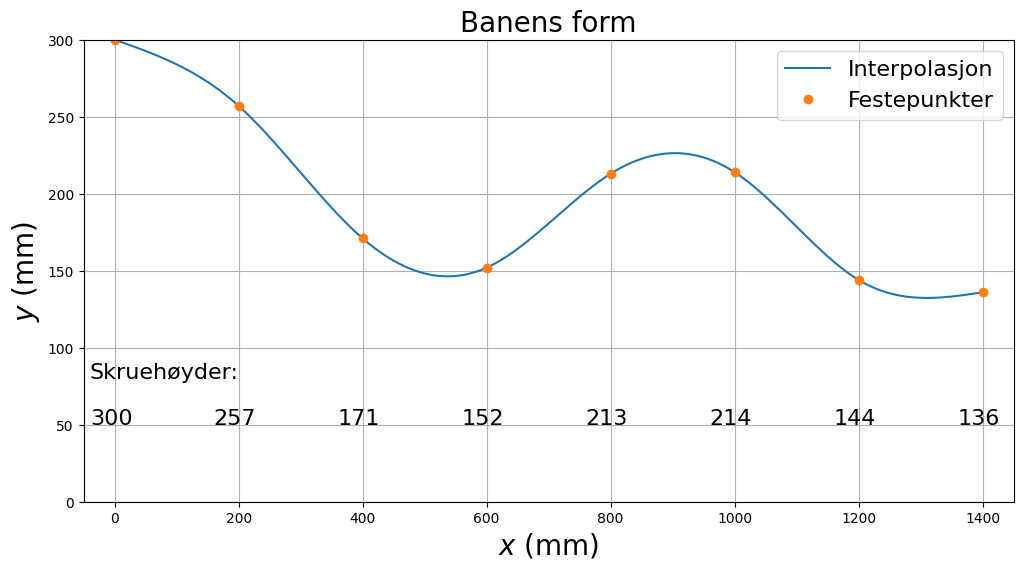

In [17]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
yfast = np.array([300, 257, 171, 152, 213, 214, 144, 136])

cs = CubicSpline(xfast,yfast,bc_type='natural')

xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)

y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)

baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y, label='Interpolasjon')
plt.plot(xfast,yfast,'o', label='Festepunkter')
plt.legend(loc='best',fontsize=16)
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$y$ (mm)',fontsize=20)
plt.text(-40,80,'Skruehøyder:', fontsize=16)
for i, skruehoyde in enumerate(yfast):
    plt.text(-40 + i*200,50,int(skruehoyde),fontsize=16)
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.show()


For å beregne relevante numeriske verdier, brukte vi formlene som ble introdusert i teori-avsnittet. Vi regnet ut x- og y-verdier ved hver hele millimeter langs x-aksen, og lagret dem i to lister. For x-listen betyr dette ganske enkelt at den inneholdt tallene fra 0 til og med 1400 i kronologisk rekkefølge, mens y-listen inneholdt de respektive y-verdiene for hver av disse x-verdiene, kalkulert ut ifra interpolasjonen gitt av `CubicSpline`. Disse verdiene, i kombinasjon med energibevaringslover, ble brukt til å regne ut fart, sentripetalakselerasjon, normalkraft og krumning.

#### Eksperimentell Gjennomføring

For den eksperimentelle delen av forsøket, ble oppsettet konstruert i henhold til de åtte valgte festepunktene, som vist i Figur 3. En meterstokk ble brukt for å sikre korrekt lengdeforhold i måleprogrammet. Objektet som ble brukt i forsøket var en liten, svart gummikule med en masse på 30 ± 0.5 g.

Hvert forsøk ble filmet med en frekvens på 60 fps og analysert ved hjelp av `Tracker`-programmet. Dette programmet lar oss spore objektets bevegelse over tid og måle viktige parametre. Ti forsøk ble gjennomført, og for hvert forsøk ble data for x, y, t, og v lagret i en fil på tekstformat. Dette gjorde det enkelt å få tilgang til dataene i Python for videre analyse. De eksperimentelle verdiene ble beregnet på samme måte som de teoretiske verdiene, og deretter sammenlignet med hverandre.

### __4. Resultater__

Her kommer resultater

### __5. Diskusjon__

Her kommer en diskusjon

### __6. Konklusjon__

Her kommer en konklusjon

### __Referanser__

Referanseliste her